In [1]:
#importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#importing heart.csv file
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
#setting an output value (Y value)
output=df.HeartDisease
output.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [4]:
#Converting categorical variables into numerical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

sex=le.fit_transform(df.Sex) #1=Male, 0=Female
chestPainType=le.fit_transform(df.ChestPainType)
restingECG=le.fit_transform(df.RestingECG)
excerciseAngina=le.fit_transform(df.ExerciseAngina)
st_slope=le.fit_transform(df.ST_Slope)


In [5]:
#dropping categorical variables from df
inputs=df.drop(columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease'])
inputs.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


In [6]:
#Adding new columns to the dataFrame
inputs['Sex']=sex
inputs['ChestPainType']=chestPainType
inputs['RestingECG']=restingECG
inputs['ExerciseAngina']=excerciseAngina
inputs['ST_Slope']=st_slope
inputs


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,0,172,0.0,1,1,1,0,2
1,49,160,180,0,156,1.0,0,2,1,0,1
2,37,130,283,0,98,0.0,1,1,2,0,2
3,48,138,214,0,108,1.5,0,0,1,1,1
4,54,150,195,0,122,0.0,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,3,1,0,1
914,68,144,193,1,141,3.4,1,0,1,0,1
915,57,130,131,0,115,1.2,1,0,1,1,1
916,57,130,236,0,174,0.0,0,1,0,0,1


In [7]:
#spliting data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [8]:
#using support vector machine algorithm for classification
from sklearn import svm

# create an SVM classifier
clf=svm.SVC(kernel='linear')

# train the classifier on the training set
clf.fit(X_train.values,y_train.values)

SVC(kernel='linear')

In [9]:
# predict the classes of the test set
clf.predict(X_test.values)

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [10]:
#obtaining the score
clf.score(X_test.values,y_test.values)

0.855072463768116

In [18]:
#adding a confusion matrix
from sklearn.metrics import confusion_matrix

y_pred=clf.predict(X_test.values)
cm=confusion_matrix(y_test.values,y_pred)
cm

array([[ 98,  14],
       [ 26, 138]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

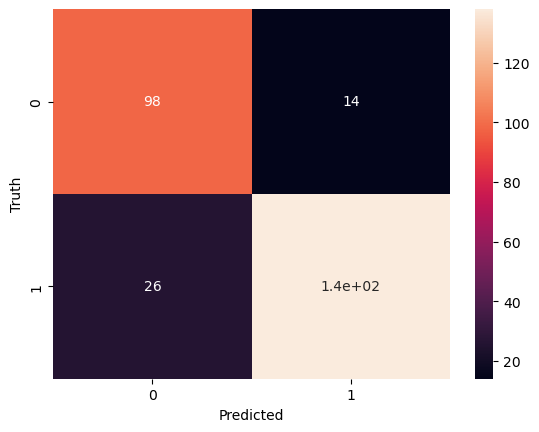

In [19]:
#adding graphical content
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [12]:
#y_intercept
clf.intercept_

array([1.79629969])

In [13]:
#gradient
clf.coef_

array([[ 1.04660435e-02, -3.23481519e-04, -2.08946951e-03,
         3.98696133e-01, -4.35825570e-03,  3.02840047e-01,
         6.48492955e-01, -2.77505593e-01, -1.06292483e-01,
         6.36792815e-01, -1.34498649e+00]])

In [14]:
import pickle

# save the model to a pickle file
pickle.dump(clf, open('heart_failure_prediction_model.pkl','wb'))

model=pickle.load(open('heart_failure_prediction_model.pkl','rb'))
model.predict([[49,160,180,0,156,1.0,0,2,1,0,1]])

array([0], dtype=int64)

In [15]:
import json
columns={'data_columns':['age','restingbp','cholesterol','fastingbs','maxhr','oldpeak','sex','chestpaintype','restingecg','exerciseangina','st_slope']}

#export list to json
with open('columns.json','w') as f:
    json.dump(columns,f)